# 0.0. IMPORTS

In [50]:
import pandas as pd
import numpy  as np
#import pickle as pi
import inflection
import math
from IPython.display import Image
#import warnings
#
#from pandas.plotting       import scatter_matrix
#from pandas_profiling      import ProfileReport
#
import seaborn as sns
from matplotlib            import pyplot as plt
#from matplotlib.gridspec   import GridSpec
#import plotly.express as px
#import plotly.figure_factory as ff
#
from datetime import timedelta, datetime
#import datetime 
#import re 
#
#import statsmodels.api as sm
#from iv                             import analise_iv as i
#from matplotlib.widgets             import Button
from IPython.core.display           import HTML
#from tabulate                       import tabulate
#
## Data preprocessing
#
#from sklearn.preprocessing          import RobustScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
#from sklearn.model_selection        import StratifiedShuffleSplit, StratifiedKFold, RepeatedStratifiedKFold
#from sklearn.model_selection        import cross_val_score, cross_validate, cross_val_predict
#from sklearn.model_selection        import train_test_split
#from sklearn.model_selection        import RandomizedSearchCV, GridSearchCV
#
## Machine leaarning models
#
#from sklearn.linear_model           import LogisticRegression
#
#
## Evaluating metrics
#
#from sklearn.metrics                import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
#from sklern.metrics                 import confusion_matrix, precision_recall_curve
#
#
#warnings.filterwarnings('ignore')
#

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()


# Frequency table
def frequency(df, vars):
    if len(vars)> 0:
        c1 = df[vars[0]]
        c2 = []
        for i in range(1,len(vars)):
            c2.append(df[vars[i]])
            dfs = []
            dfs.append(pd.crosstab(c1,c2).unstack().reset_index().rename(columns={0: 'contagem'}))
            dfs.append(pd.crosstab(c1,c2, normalize='all').unstack().reset_index().rename(columns={0:'percent'}))
            dfs = [df.set_index(vars) for df in dfs]
            df = dfs[0].join(dfs[1:]).reset_index()
            return df 
        
# Outliers
def outliers(dataset, var):
    
    figure, gr = plt.subplots()
    
    gr.figure.set_size_inches(14,12)
    
    plt.subplot(2,1,1)
    gr = sns.histplot(dataset[var], bins=50)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    
    plt.subplot(2,1,2)
    gr = sns.boxplot(dataset[var])
    plt.xlabel(var, fontsize=14)
    plt.show()
    
    # calculando Q1, Q3 and FIQ
    Q1 = dataset[var].quantile(0.25)
    Q3 = dataset[var].quantile(0.75)
    FIQ = Q3 - Q1
    
    # calculando o limite dos outliers
    min_outlier = Q1 - 1.5 * FIQ
    max_outlier = Q3 + 1.5 * FIQ
    
    print('Limites para outliers: ''\n')
    print(f'Q1 = {Q1}\nQ3 = {Q3}\nFIQ = {FIQ}\nmin_outlier = {min_outlier}\nmax_outlier = {max_outlier}')

# Coeficiente de determinação R²

def coef_r2(dataset, var_1, target):
    
    a = dataset[[var_1, target]]
    b = dataset[dataset[target]== 0]
    c = dataset[dataset[target]== 1]
    d = ((len(c)*c[var_1].var())+(len(b)*b[var_1].var()))/ len(a)
    e = a[var_1].var()
    
    r2 = 1 - (d/e)
    
    return r2


## Função feature selection
#
#def feature_selection(x_treino, y_treino):
#    rf = RandomForestClassifier(random_state=42)
#    rf.fit(x_treino, y_treino)
#    
#    feat_imp = pd.DataFrame({'Váriaveis': x_treino.columns,
#                            'Importância da Variável': rf.feature_importances_}).sort_values('Importância da Variável',
#                                                                                            ascending=False).reset_index(drop=True)
#    plt.subplot(figsize=(12,6))
#    sns.barplot(x='Importância da Variável',y='Váriaveis', data=feat_imp,orient='h',color='green')
#    plt.show()
#
## Função performance dados teste
#
#def performance_treino(x_treino, y_treino, x_teste, y_teste, modelo, nome_modelo):
#    #treinando modelo
#    modelo.fit(x_treino, y_treino)
#    
#    # Previsões do modelo 
#    
#    y_hat = modelo.predict(x_teste)
#    
#    # Métricas de performance
#    
#    acuracia = accuracy_score(y_teste, y_hat)
#    precisao = precision_score(y_teste,y_hat)
#    sensibilidade = recall_score(y_teste, y_hat)
#    f1 = f1_score(y_teste, y_hat)
#    
#    # Dataframe das métricas
#    
#    df_performance = pd.DataFrame({'Acurácia': acuracia,
#                                   'Precisão': precisao,
#                                   'Sensibilidade': sensibilidade,
#                                   'F1_score': f1}, index=[nome_modelo])
#    
#    # Matriz de confusão
#    cm = confusion_matrix (y_teste, y_hat)
#    
#    # Heatmap matriz de confusão
#    
#    df_cm = pd.DataFrame(cm)
#    
#    return df_performance, df_cm
#
## Função cross validation
#
#def validacao_cruzada(x, y, classificadores, nomes_classificadores):
#    
#    resultados = {}
#    
#    for i in range(len(classificadores)):
#        accs_vc = cross_validate(classificadores[i], x, y, cv=StratifiedKFold(n_splits=10),
#                                scoring = ['accuracy', 'precision', 'recall','f1'])
#        
#        acc = accs_vc['accuracy_test'].mean()
#        prec = accs_vc['precision_test'].mean()
#        sens = accs_vc['recall_test'].mean()
#        f1 = accs_vc['f1_test'].mean()
#        
#        resultados[nomes_classificadores[i]] = [acc,prec,sens,f1]
#        resultados = pd.DataFrame(resultados, index=['Acurácia', 'Precisão','Sensibilidade', 'F1-Score'])
#        
#        return resultados
#    
## Função ML + cross validation - dados de treino
#
#def machine_learning(classificadores, nomes_classificadores, x_treino, y_treino):
#     
#    for clf in classificadores:
#        print('Treinando modelos' + type(clf).__name__+ '...')
#       # treinando classificador
#        clf.fit(x_treino, y_treino)
#            
#        perfomance = validacao_cruzada(x_treino,y_treino,classificadores,nomes_classificadores)
#            
#    return perfomance.T 
#
## Matrizes de confusão
#
#def matrizes_confusao(modelos, x_treino,y_treino,linhas, colunas, a, b):
#    
#    # plot
#    fig, ax = plt.subplot(nrows = linhas, ncols = colunas, figsize=(a,b))
#    
#    for mod, ax, n in zip (range(len(modelos)), ax.flatten(), list(range(linhas*colunas))):
#        
#        plt.subplot(linhas, colunas, n+1)
#        
#        predicoes = cross_val_predict(modelos[mod], x_treino,y_treino, cv=StratifiedKFold(n_splits=10))
#        
#        cm - confusion_matrix(y_treino, predicoes)
#        
#        ax = sns.heatmap(cm, annot=True, fmt='g', cmap='viridis',
#                         square=True, annot_kws={'size': 14})
#        
#        plt.xlabel('Predict Value')
#        plt.ylabel('Real Value')
#        ax.title.set_text(type(modelos[mod]).__name__)
#    plt.tight_layout()
#    plt.show()
#    
## Função Hyperparameter finetunnig
#
#def hipertunagem( modelo,treino,target,tipo = 'grid', n_iter=20 ):
#    
#    validacao = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
#    
#    if tipo =='grid':
#        search = GridSearchCV(modelo, param_grid=parametros,
#                              scoring= 'f1', cv = validacao,
#                              n_iter=n_iter, verbose=1, n_jobs=-1)
#    
#    elif tipo == 'random':
#        search = RandomizedSearchCV(modelo, param_distributions=parametros,
#                                    scoring= 'f1', cv = validacao,
#                                    n_iter=n_iter, verbose=1, n_jobs=-1)
#    else:
#        print('Entrada invalida no argumento "tipo"')
#        
#    
#    search.fit(treino,target)
#    
#    estimadores = search.best_estimator_
#    
#    print('\nF1-Score: {:.4f}'.format(search.best_score_))
#    
#    print('Melhores parâmetros: {}\n'.format(search.best_params))
#    
#    return estimadores
#
#
## função performance dados de teste - possibilidade variação threshold
#
#def perfomance_teste1(nome_modelo,modelo, x_teste,y_teste, threshold):
#    
#    # predict
#    
#    y_hat = modelo.predict_proba(x_teste)
#    
#    #dataframe
#    
#    probs = pd.DataFrame(y_hat[:,1], columns=['probs'])
#    
#    # appling threshold
#    
#    y_hat = probs['probs'].apply(lambda x: 1 if x > threshold else 0)
#    
#    # Métricas de performance
#    
#    accuracy = accuracy_score(y_teste, y_hat)
#    precision  = precision_score(y_teste,y_hat)
#    recall = recall_score(y_teste, y_hat)
#    f1 = f1_score(y_teste, y_hat)
#    roc_auc = roc_auc_score(y_teste,y_hat)
#    
#    # Dataframe das métricas
#    
#    performance_df = pd.DataFrame({'Acurácia': acuracia,
#                                   'Precisão': precisao,
#                                   'Sensibilidade': sensibilidade,
#                                   'F1_score': f1,
#                                   'ROC AUC Score': roc_auc},index=[nome_modelo])
#    
#    # Matriz de confusão
#    cm = confusion_matrix (y_teste, y_hat)
#    
#    # Heatmap matriz de confusão
#    
#    cm_df = sns.heatmap(cm, annot=True,fmt='g', cmap='Greens',
#                        square=True, annot_kws={'size': 14})
#    
#        
#    return performance_df, cm_df

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading data

In [3]:
df_sales_raw = pd.read_csv( 'train.csv', low_memory=False )
df_store_raw = pd.read_csv( 'store.csv', low_memory=False )

# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store' )

In [4]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0 DESCRICAO DOS DADOS

In [5]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

## 1.2. Data Dimensions

In [7]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Data Types

In [8]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [10]:
#competition_distance
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else (x))

#competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

#promo_interval 
month_map = {1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map) 

df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)



In [11]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Data Types

In [12]:
# competiton
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
    
# promo2
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## 1.7. Descriptive Statistics

In [13]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.7.1. Numerical Atributes

In [14]:
# Central Tendency - mean, mediana 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.165966,0.0,0.372050,1.795644,1.224338


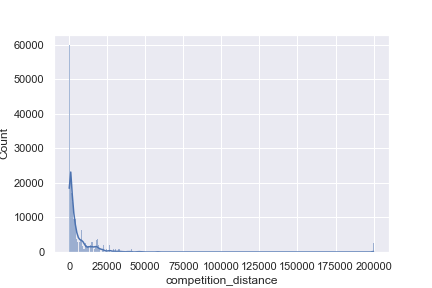

In [15]:
# Histograma da feature competition distance
%matplotlib widget
sns.histplot(data=df1, x='competition_distance', kde=True );

### 1.7.2. Categorical Atributes

In [16]:
#Qtda de valores únicos de cada feature categórica
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo2_since_week               52
promo2_since_year                7
promo_interval                   4
month_map                       12
dtype: int64

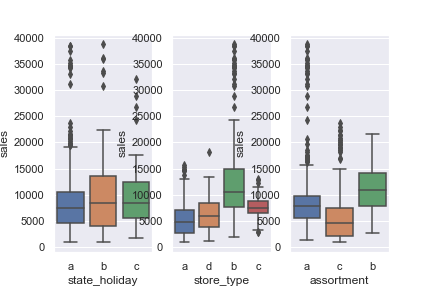

In [17]:
# Boxplot de features categóricas em relação as vendas
%matplotlib widget
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux );

In [18]:
aux.head().T

,63559,63560,63609,63611,63614
store,5,6,55,57,60
day_of_week,4,4,4,4,4
date,2015-06-04 00:00:00,2015-06-04 00:00:00,2015-06-04 00:00:00,2015-06-04 00:00:00,2015-06-04 00:00:00
sales,5807,5749,5984,9301,10399
customers,625,614,702,870,850
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,a,a,a,a,a
school_holiday,0,0,0,0,0
store_type,a,a,a,d,d


# 2.0 FEATURE ENGINEERING

## 2.1. Mind Map Hypothesis

In [32]:
df2 = df1.copy()

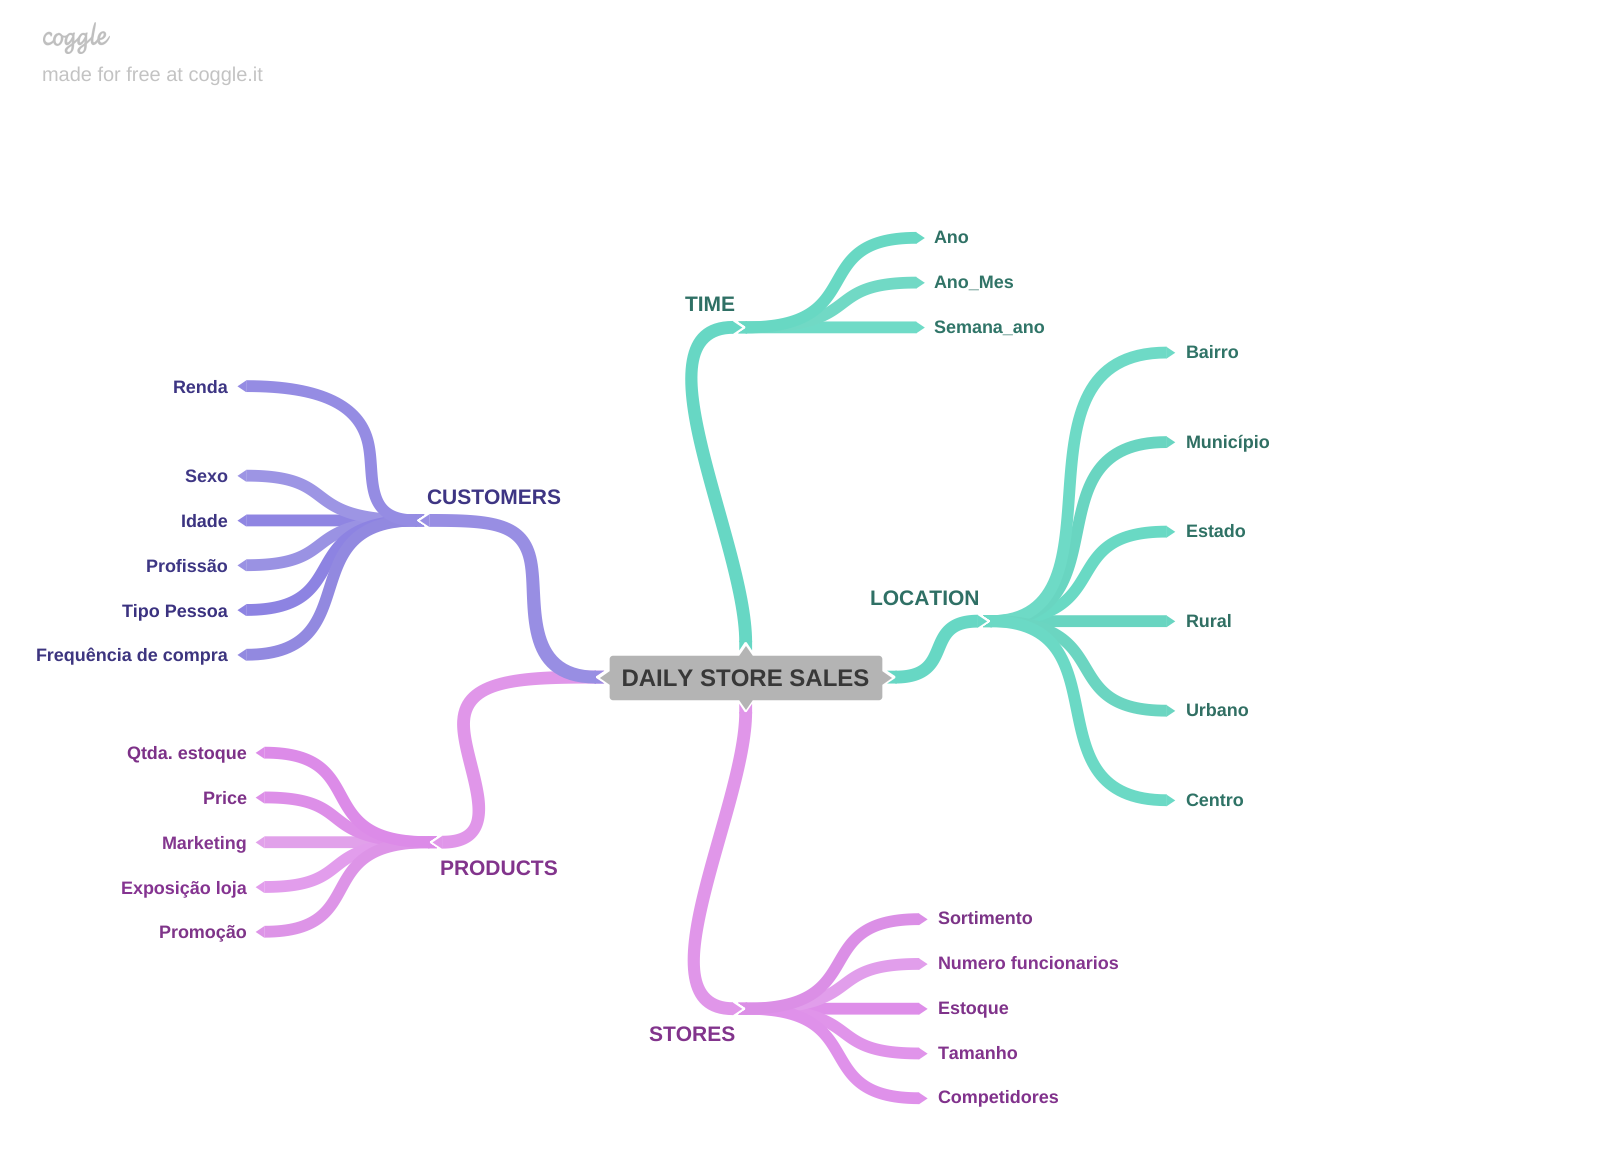

In [20]:
Image('DAILY_STORE_SALES_Mind_map_hip.png')

##  2.2. Criação das Hipóteses

### 2.2.1. Hipoteses de Loja

**H1.** Lojas com maior quadro de funcionarios deveriam vender mais.

**H2.** Lojas com maior estoque deveriam vender mais.

**H3.** Lojas com maior porte deveriam vender mais.

**H4.** Lojas com competidores a mais tempo deveriam vender mais.

**H5.** Lojas com maior sortimento deveriam vender mais.

**H6.** Lojas com competidores mais próximos deveriam vender mais.

### 2.2.2. Hipoteses de Produto

**H1.** Lojas que investem mais em marketing deveriam vender mais.

**H2.** Lojas que expoem mais os produtos nas vitrines deveriam vender mais.

**H3.** Lojas que tem preços menores deveriam vender mais.

**H4.** Lojas que tem preços menores por mais tempo deveriam vender mais.

**H5.** Lojas com promoções mais agressivas (maiores descontos), deveriam vender mais.

**H6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**H7.** Lojas com mais dias de promoção devriam vender mais.

**H8.** Loja com mais promoções consecutivas deveriam vender mais.

### 2.2.3. Hipoteses de Tempo

**H1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**H2.** Lojas deveriam vender mais ao longo dos anos.

**H3.** Lojas deveriam vender mais no segundo semestre do ano.

**H4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**H5.** Lojas deveriam vender menos aos finais de semana.

**H6.** Lojas deveriam vender menos durante feriados escolares.

## 2.3. Lista final de Hipóteses

**H1.** Lojas com maior sortimento deveriam vender mais.

**H2.** Lojas com competidores mais próximos deveriam vender mais.

**H3.** Lojas com competidores a mais tempo deveriam vender mais.

In [59]:
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


**H4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**H5.** Lojas com mais dias de promoção devriam vender mais.

**H6.** Loja com mais promoções consecutivas deveriam vender mais.

**H7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**H8.** Lojas deveriam vender mais ao longo dos anos.

**H9.** Lojas deveriam vender mais no segundo semestre do ano.

**H10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**H11.** Lojas deveriam vender menos aos finais de semana.

**H12.** Lojas deveriam vender menos durante feriados escolares.

## 2.4. Feature Engineering

In [55]:
# year
#df2['year'] = df2['date'].dt.year
#
## Month
#df2['month'] = df2['date'].dt.month
#
## day
#df2['day'] = df2['date'].dt.day
#
## week of year
#df2['week_of_year'] = df2['date'].dt.weekofyear
#
## year week
#df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
#df2['competition_since'] = df2.apply(lambda x: datetime.datetime( year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1), axis=1)
#df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# Promo since
#df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
#df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.strptime( x + '-1', '%Y-%W-%w') - timedelta(days=7))
#df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/ 7).apply( lambda x: x.days).astype(int)

# assortment
#df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )
#
## state holiday
#
#df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

# 3.0. DATA FILTERING

In [75]:
df3 = df2.copy()

In [76]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1. Filtragem de linhas 

In [77]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2. Filtragem de colunas

In [78]:
cols_drop = ['customers','open','promo_interval','month_map']
df3 = df3.drop(cols_drop, axis=1)

In [79]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

## 4.0. EXPLORATORY DATA ANALYSIS (EDA)